## Characteristics

Vector_XY is a set of three modules for:

* Generation of 2D (xy-axis) paraxial vector light source.
* Generation of 2D (xy-axis) paraxial vector masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields.

These modules are named: vector_fields_XY.py, vector_sources_XY.py, and vector_masks_XY.py.

Each module present a main class:

* Vector_field_XY
* Vector_mask_XY
* Vector_source_XY

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.wavelength (float): wavelength of the incident field.
* (numpy.array): complex field with size 2D x.y  
    - self.Ex
    - self.Ey
    - self.Ez

    
We can also find these atributes:

* self.X (numpy.array): equal size to x * y. complex field.
* self.Y (numpy.array): equal size to x * y. complex field.
* self.quality (float): quality of RS propagation. Valid for values > 1.
* self.info (str): description of data.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The propagation techiniques implemented are:

* RS - Rayleigh-Sommerfeld propagation for Ex and Ey fields
* VRS - Complete vector propagation (Ex, Ey, Ez) in Rayleigh-Sommerfeld approach.
* VFFT - Vector propagation to the focal distance of a lens.

The dimensional magnitudes are related to microns: `micron = 1.`

### Generation of light sources

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

### Creating an instance

In [52]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Generating a vectorial light source

Light sources are defined in the scalar_sources_xy.py module. When the field is initialized, the amplitude of the field is zero. Vector sources are generated using a scalar source and providing a vector polarization. There are many methods to convert a scalar source to a vector source:

* **constant_polarization**: Generates a plane wave with a given direction and amplitude.
* **radial_wave**: Generates a plane wave with radial polarization.
* **azimuthal_wave**: Generates a plane wave with transversa polarization.
* **radial_inverse_wave**: 
* **local_polarized_vector_wave**: Local radial polarized vector wave.
* **local_polarized_vector_wave_radial**: Local radial polarized vector wave.
* **local_polarized_vector_wave_hybrid**: Local hibrid polarized vector wave.
* **spiral_polarized_beam**: Spiral polarized wave.

For a more detailed description of each method, refer to the individual documentation of each one.

Example: gauss azimuthal_wave

In [53]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 = np.linspace(-125*um, 125*um, 512)

wavelength = 0.6328*um

Scalar source

In [54]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0*um, 0*um), w0=100*um, z0=0*um, A=1)


Vector source

In [55]:
EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.radial_wave(u=u0, r0=(0*um, 0*um), radius=(200, 200))


If we need, we can convert the $E_x$ and $E_y$ fields in Scalar_field_XY.

In [56]:
Ex, Ey, _ = EM1.get(is_matrix=False)
print(Ex)

Scalar_field_XY
 - x:  (512,),   y:  (512,),   u:  (512, 512)
 - xmin:       -125.00 um,  xmax:      125.00 um,  Dx:   0.49 um
 - ymin:       -125.00 um,  ymax:      125.00 um,  Dy:   0.49 um
 - Imin:       0.00,     Imax:      0.99
 - phase_min:  -180.00 deg, phase_max: 0.00 deg
 - wavelength: 0.63 um
 - date:       2024-10-11_21_24_33



We can obtain a variety of representation, simply using the draw method.

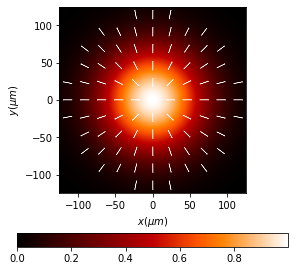

In [57]:
EM1.draw(kind='ellipses')

Polarimetric representation can be performed in a simple way.

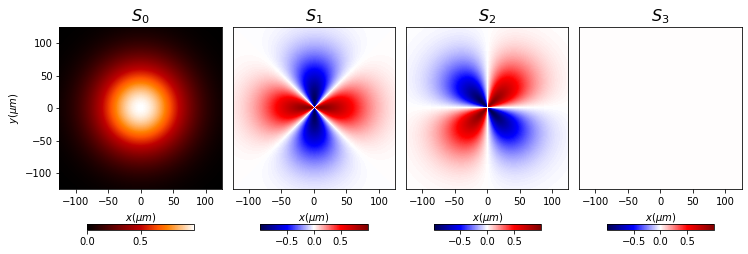

In [58]:
EM1.draw('stokes')


## A vector light source passes through a linear polarizer

<Figure size 432x288 with 0 Axes>

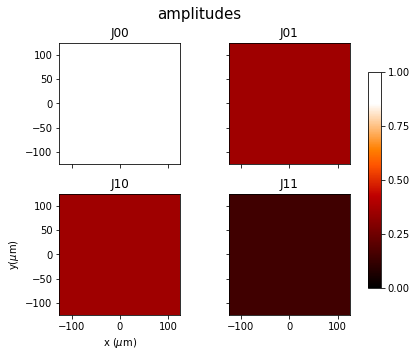

In [59]:
M1 = Vector_mask_XY(x=x0, y=y0, wavelength=wavelength)
M1.polarizer_linear(azimuth=22.5*degrees)
M1.draw()

### Multiplying fields by mask
We can have complex vector mask using the functions based on Scalar_XY masks. Also, vector masks are provided which act as simple polarizers.

In [60]:
EM2 = EM1 * M1

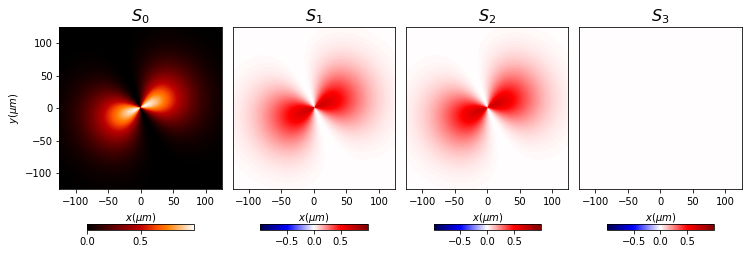

In [61]:
EM2.draw('stokes')

As the polarizer is linear at 45º, only $S_2$ parameter is obtained.

### Propagation
Vector fields can be propagated using Rayleigh-Sommerfeld approach.

In [62]:
EM3 = EM2.VRS(z=2*mm, new_field=True)

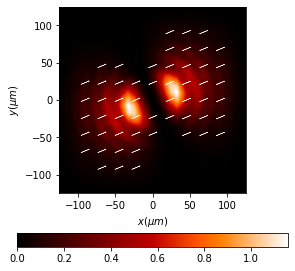

In [63]:
EM3.draw('ellipses')

Light is propagated, but as the polarization is the same for all the positions, the result is the same as an scalar propagation.

## Propagation of an spiral polarized beam 

In [64]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 = np.linspace(-125*um, 125*um, 512)

wavelength = 0.6328*um

In [65]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0*um, 0*um),
              w0=(75*um, 75*um),
              z0=0*um,
              A=1,
              theta=0*degrees,
              phi=0*degrees)


In [66]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.spiral_polarized_beam(u0, r0=(0*um, 0*um), alpha=45*degrees)


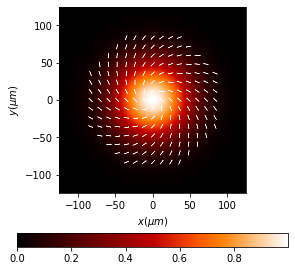

In [67]:
EM0.draw('ellipses', num_ellipses=(21, 21), amplification=0.5)

In [68]:
EM1 = EM0.VRS(z=5*mm, verbose=True)

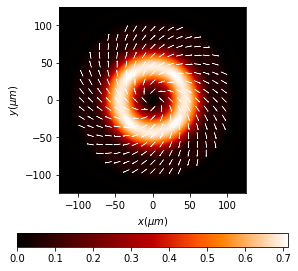

In [69]:
EM1.draw('ellipses', num_ellipses=(21, 21), amplification=0.75)

## Vector Rayleigh-Sommerfeld Approximation

We have implemented the Vector Rayleigh-Sommerfeld approach to propagation of vectorial fields as used in H. Ye, C.-W. Qiu, K. Huang, J. Teng, B. Luk’yanchuk, y S. P. Yeo, «Creation of a longitudinally polarized subwavelength hotspot with an ultra-thin planar lens: vectorial Rayleigh–Sommerfeld method», Laser Phys. Lett., vol. 10, n.º 6, p. 065004, jun. 2013. DOI: 10.1088/1612-2011/10/6/065004 (http://stacks.iop.org/1612-202X/10/i=6/a=065004?key=crossref.890761f053b56d7a9eeb8fc6da4d9b4e). 
In the propagation, there is a transference of field from the Ex, Ey polarizations to Ez polarization.


In [91]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY

In [96]:
size = 50*um
x0 = np.linspace(-size/2, size/2, 256)
y0 = np.linspace(-size/2, size/2, 256)
wavelength = .6328*um


In [97]:
focal = 25*um

t = Scalar_mask_XY(x0, y0, wavelength)
t.lens(r0=(0*um, 0*um), focal=focal, radius=size)


In [100]:
E0 = Vector_source_XY(x0, y0, wavelength)
E0.radial_wave(u=t)
E0.pupil()

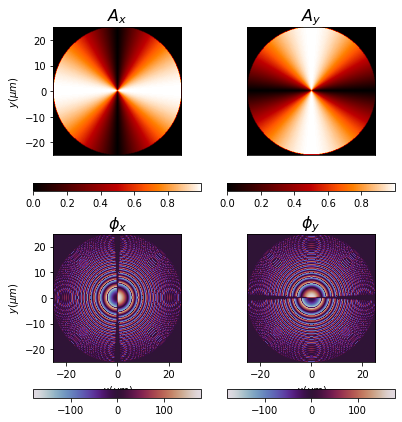

In [101]:
E0.draw('fields')

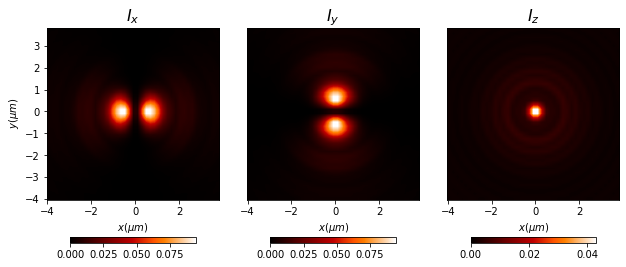

In [102]:
E1 = E0.VRS(z=focal, n=1, new_field=True, verbose=False, amplification=(1, 1))
E1.cut_resample(x_limits=(-4*um, 4*um), y_limits=(-4*um, 4*um))
E1.draw(kind='intensities', logarithm=1e-3)


Additionally, r-z fields can be drawn for vector fields:

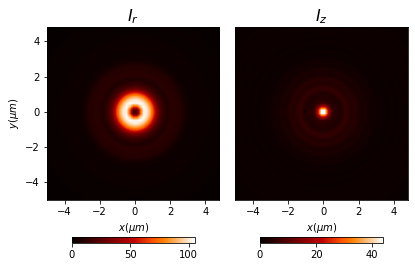

In [103]:
E1 = E0.VRS(z=focal, n=1, new_field=True, verbose=False, amplification=(1, 1))
E1.cut_resample(x_limits=(-5*um, 5*um), y_limits=(-5*um, 5*um))
E1.draw(kind='intensities_rz', logarithm=False)

## Vector Fast Fourier Transform

We have implemented an algorithm to obtain the vector field distribution at the focal plane of a lens. The algorithm is based on Richards–Wolf theory, according to K. Jahn and N. Bokor, “Intensity control of the focal spot by vectorial beam shaping,” Opt. Commun., vol. 283, no. 24, pp. Nevertheless, 2D Fast Fourier Transform (FFT) is used to calculate the double integral, instead of 2D Chirp-z Transform (VCZT). This procedure will be implemented in the future.

In [77]:
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [78]:
size = 250*um
x0 = np.linspace(-size/2, size/2, 1024)
y0 = np.linspace(-size/2, size/2, 1024)

wavelength = 0.6328*um

In [79]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0*um, 0*um),
              w0=(75*um, 75*um),
              z0=0*um,
              A=1,
              theta=0*degrees,
              phi=0*degrees)
u0.pupil()

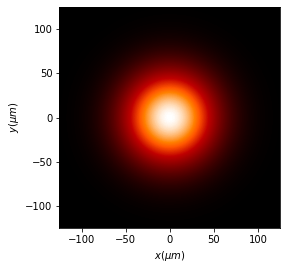

In [80]:
u0.draw()

In [81]:
EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u0, v=(1, 0))
EM1.pupil()

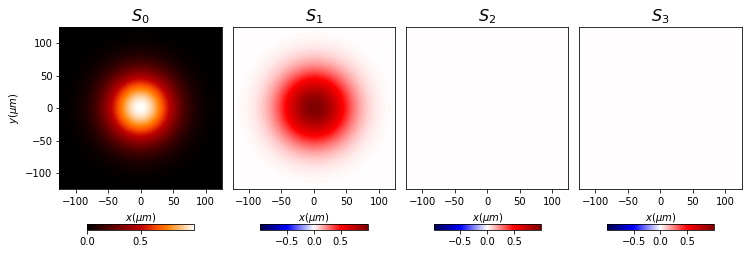

In [82]:
EM1.draw('stokes')

In [83]:
EM2 = EM1.VFFT(radius=64*um,
               focal=1*mm,
               remove0=False,
               n=1,
               new_field=True,
               has_draw=False)

In [84]:
x_resample = 20*um
EM2.cut_resample([-x_resample, x_resample], [-x_resample, x_resample],
                 num_points=(1024, 1024))

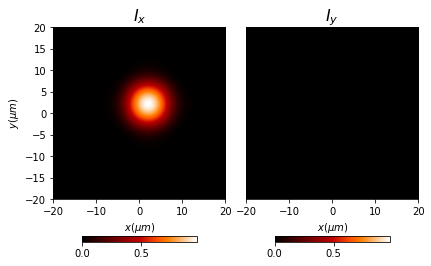

In [85]:
EM2_vfft = EM1.VFFT(radius=radius, focal= focal, remove0=False, new_field=True)
EM2_vfft.cut_resample([-x_r, x_r], [-x_r, x_r], num_points=(256, 256))
EM2_vfft.draw('intensities', logarithm=1e0)

Let us compare this result with that obtained with VRS. We need to include the lens in the mask.

In [86]:
radius = 250*um
t_lens = Scalar_mask_XY(x0, y0, wavelength)
t_lens.lens(r0=(0*um, 0*um), radius=radius, focal=1000*um)

In [87]:
u2 = t_lens * u0

EM3 = Vector_source_XY(x0, y0, wavelength)
EM3.constant_polarization(u=u2, v=(1, 0))

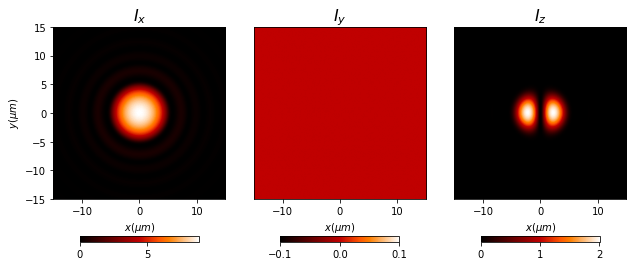

In [88]:
EM4 = EM3.VRS(z=100*um, n=1, new_field=True)

In [89]:
x_resample = 150*um
EM4.cut_resample([-x_resample, x_resample], [-x_resample, x_resample],
                 num_points=(512, 512))

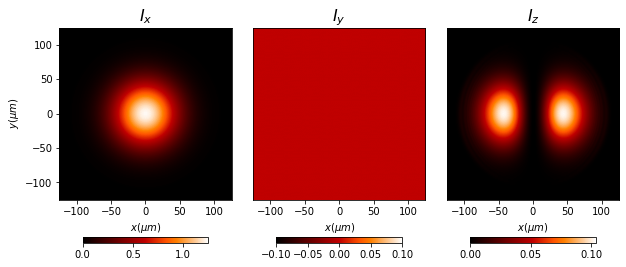

In [90]:
EM4_vczt = EM3.CZT(z=focal, xout=np.linspace(-x_r,x_r,256), yout=np.linspace(-x_r,x_r,256))
EM4_vczt.draw('intensities', logarithm=1e1)

In comparison to VFFT, we can see that the $I_x$ and $I_z$ are reproduced in a similar way, but the VRS or CZT algorithms are not able to generate $I_y$ field.